In [2]:
from sympy import *
import pickle
init_printing(use_unicode=True)

In [3]:
def calcular_matriz(a):
    permutations = {
        '1': [1, 2, 3],
        '2': [1, 2, 4],
        '3': [1, 2, 5],
        '4': [1, 3, 4],
        '5': [1, 3, 5],
        '6': [1, 4, 5],
        '7': [2, 3, 4],
        '8': [2, 3, 5],
        '9': [2, 4, 5],
        '10': [3, 4, 5]
    }
    M = Matrix(10, 5, lambda i, j: Symbol(f'B_{i},{j}'))
    for i in range(1, 11):
        b = permutations[str(i)]
        for j in range(1, 6):
            M[i-1, j-1] = LeviCivita(b[0], b[1], b[2], a, j)
    return M

def calcular_linha(a):
    M = Matrix(1, 5, lambda i, j: Symbol(f'B_{i},{j}'))
    for i in range(0, 5):
        M[0, i] = KroneckerDelta(a, i+1)
    return M

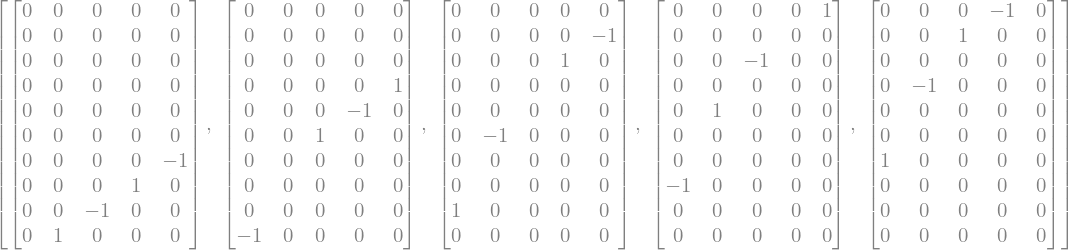

In [4]:
M = []
V = []
for i in range(1, 6):
    M.append(calcular_matriz(i))

for i in range(1, 6):
    V.append(calcular_linha(i))

M

In [6]:
V

In [7]:
vectorialBeta = []
for i in range(0, 5):
    vectorialBeta.append(BlockMatrix([[zeros(5,5)  , zeros(5,10)      , zeros(5,5)     , V[i].transpose()],
                             [zeros(10, 5), zeros(10,10)     , M[i]           , zeros(10, 1)],
                             [zeros(5, 5), -M[i].transpose(), zeros(5,5)     , zeros(5,1)],
                             [-V[i]       , zeros(1, 10)     , zeros(1,5)     , zeros(1,1)]]))
    vectorialBeta[i] = Matrix(vectorialBeta[i])

vectorialBeta0 = SparseMatrix(21, 21, {(0,15):-1, (1,16): -1, (2,17):-1, (3,18):-1, (4,19):-1, 
                                       (15,0):-1, (16,1): -1, (17,2):-1, (18,3):-1, (19,4):-1})
vectorialBeta.insert(0, vectorialBeta0)

# Algorítmo de teste para minhas matrizes $21 \times 21$

In [9]:
g = Matrix([[1, 0, 0, 0, 0, 0],
            [0, -1, 0, 0, 0, 0],
            [0, 0, -1, 0, 0, 0],
            [0, 0, 0,-1, 0, 0],
            [0, 0, 0, 0, -1, 0],
            [0, 0, 0, 0, 0, -1]])

for i in range(0, 6):
    for j in range(0, 6):
        for k in range(0, 6):
            if vectorialBeta[i]*vectorialBeta[j]*vectorialBeta[k] + vectorialBeta[k]*vectorialBeta[j]*vectorialBeta[i] == vectorialBeta[i]*g[j, k] + vectorialBeta[k]*g[j, i]:
                print(str(i) + str(j) + str(k) + ' Verdadeiro.')
            else:
                print(str(i) + str(j) + str(k) + ' Falso')
                

000 Verdadeiro.
001 Verdadeiro.
002 Verdadeiro.
003 Verdadeiro.
004 Verdadeiro.
005 Verdadeiro.
010 Verdadeiro.
011 Verdadeiro.
012 Verdadeiro.
013 Verdadeiro.
014 Verdadeiro.
015 Verdadeiro.
020 Verdadeiro.
021 Verdadeiro.
022 Verdadeiro.
023 Verdadeiro.
024 Verdadeiro.
025 Verdadeiro.
030 Verdadeiro.
031 Verdadeiro.
032 Verdadeiro.
033 Verdadeiro.
034 Verdadeiro.
035 Verdadeiro.
040 Verdadeiro.
041 Verdadeiro.
042 Verdadeiro.
043 Verdadeiro.
044 Verdadeiro.
045 Verdadeiro.
050 Verdadeiro.
051 Verdadeiro.
052 Verdadeiro.
053 Verdadeiro.
054 Verdadeiro.
055 Verdadeiro.
100 Verdadeiro.
101 Verdadeiro.
102 Verdadeiro.
103 Verdadeiro.
104 Verdadeiro.
105 Verdadeiro.
110 Verdadeiro.
111 Verdadeiro.
112 Verdadeiro.
113 Verdadeiro.
114 Verdadeiro.
115 Verdadeiro.
120 Verdadeiro.
121 Verdadeiro.
122 Verdadeiro.
123 Verdadeiro.
124 Verdadeiro.
125 Verdadeiro.
130 Verdadeiro.
131 Verdadeiro.
132 Verdadeiro.
133 Verdadeiro.
134 Verdadeiro.
135 Verdadeiro.
140 Verdadeiro.
141 Verdadeiro.
142 Verd

# Transferência para o arquivo

In [144]:
vectorialBeta = {
    'vectorialBeta': vectorialBeta
}

with open('vectorialBeta.pkl', 'wb') as arquivo:
    pickle.dump(vectorialBeta, arquivo)